# Introduction to Pandas Library
- Pandas is an open source library in python which is know for its rich applications and utilities for all kinds of mathematical, financial and statistical functions
- It is useful in data manipulation and analysis
- It provides fast, flexible, and expressive data structures designed to make working with structured (tabular, multidimensional, potentially heterogeneous) and time series data



#### Installing pandas

In [ ]:
!pip install pandas

#### Importing pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Series

#### Series -

   - are one-dimensional ndarray with axis labels (homogenous data)
   - labels need not be unique but must be of immutable type



### Creating Series

###### Ex. Create series using the given list of names

In [ ]:
name = ["Jack", "Jane", "Rosie", "George", "Sam"]
ser_names = pd.Series(name)
ser_names

### Extracting elements from series

#### Indexing based on index number

In [ ]:
ser_names[0]

In [ ]:
ser_names[0:3]

#### Assigning names as index to marks

In [ ]:
name = ["Jack", "Jane", "Rosie", "George", "Sam"]
marks = pd.Series(np.random.randint(5, 20, size = 5), index=name)
marks

In [ ]:
name = ["Jack", "Jane", "Rosie", "George", "Sam"]
marks = pd.Series(np.random.randint(5, 20, size = 5))
marks.index = name
marks

#### Indexing based on index name

In [ ]:
marks["Jane"]

In [ ]:
marks["Jane" : "George"]

### Filtering Series / Conditional Indexing

In [ ]:
marks[marks < 15]

### Operations on Series

In [ ]:
marks/20 * 100

### Ranking and Sorting

series.sort_values(`ascending=True`, `inplace=False`, `na_option = {"first","last"}`) <br>
series.sort_index(`ascending=True`, `inplace=False`)
<br>
series.rank(`ascending=False`, `method={"average","min","dense"}`, `na_option = {"top","bottom"}`)

In [ ]:
marks.sort_values(ascending=False, inplace=True)
marks

In [ ]:
marks.rank().astype(int)

### Working with NULLs

In [ ]:
name = ["Jack", "Jane", "Rosie", "George", "Sam"]
marks = pd.Series(np.random.randint(5, 20, size = 5))
marks.index = name
marks

In [ ]:
marks = pd.concat((marks, pd.Series([np.nan, np.nan], index = ["Bill", "Thomas"])))
marks

In [ ]:
marks.isna().any()

In [ ]:
marks.isna().sum()

In [ ]:
marks.fillna(0, inplace=True)

<hr><hr>

# Dataframe

A DataFrame is two dimensional data structure where the data is arranged in the tabular format in rows and columns

#### DataFrame features:

- Columns can be of different data types
- Size of dataframe can be changes
- Axes(rows and columns) are labeled
- Arithmetic operations can be performed on rows and columns

### Creating Dataframes

In [ ]:
employees = {"Name" : ["Jack", "Bill", "Lizie", "Jane", "George"],
            "Designation" : ["HR", "Manager", "Developer", "Intern", "Manager"],
            "Salary": [40000, 60000, 25000, 12000, 70000]}

df = pd.DataFrame(employees)
df

### Accessing Dataframes

In [ ]:
df["Name"]

In [ ]:
df.Name

In [ ]:
df[["Name", "Salary"]]

### Operations on dataframes

###### Ex. Average Salary

In [ ]:
df.Salary.mean()

###### Ex. Average Salary of managers

In [ ]:
df[df.Designation == "Manager"].Salary.mean()

### Concataneting and Merging Dataframes

In [ ]:
df_jan = pd.DataFrame({"Order ID" : range(101, 111), "Sales" : np.random.randint(10000, 50000, 10)})
df_feb = pd.DataFrame({"Order ID" : range(111, 121), "Sales" : np.random.randint(10000, 50000, 10)})
df_mar = pd.DataFrame({"Order ID" : range(121, 131), "Sales" : np.random.randint(10000, 50000, 10)})

#### Concatenate
pd.concat(`tuple of dfs`, `ignore_index = False`, `axis=0`)

In [ ]:
pd.concat((df_jan, df_feb, df_mar), ignore_index=True)

In [ ]:
pd.concat((df_jan, df_feb, df_mar),  axis=1)

#### Merging Dataframes

`df1.merge(df2, how="", left_on="", right_on="", left_index= "" , right_index="")`

In [ ]:
df_emp = pd.DataFrame({"Name" : ["Jack", "Bill", "Lizie", "Jane", "George"],
            "Designation" : ["HR", "Manager", "Developer", "Intern", "Manager"]})
df_emp

In [ ]:
base_salaries = pd.DataFrame({"Designation" : ["HR", "Developer", "Manager", "Senior Manager"],
            "Salary": [40000, 25000, 70000, 1000000]})
base_salaries

#### Inner Merge

In [ ]:
df_emp.merge(base_salaries, how = "inner", on= "Designation")

#### Left Merge

In [ ]:
df_emp.merge(base_salaries, how = "left", on= "Designation")

#### Right Merge

In [ ]:
df_emp.merge(base_salaries, how = "right", on= "Designation")

#### Outer Merge

In [ ]:
df_emp.merge(base_salaries, how = "outer", on= "Designation")

## Reading data from Data Sources

### Examples using Coffee Shop Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Datasets/coffee_sales.csv", header=3)
df.drop(columns=[df.columns[0]], inplace= True)
df.fillna({"Target Profit" : "0"}, inplace=True)
transobj = str.maketrans("", "", "$,")
df.Sales = df.Sales.str.translate(transobj).astype(float)
df.Profit = df.Profit.str.translate(transobj).astype(float)
df["Target Sales"] = df["Target Sales"].str.translate(transobj).astype(float)
df["Target Profit"] = df["Target Profit"].str.translate(transobj).astype(float)
df["Sales Target Status"] = np.where(df.Sales > df["Target Sales"], "Achieved", "Not Achieved")
df.head()

###### Ex. Read data from `coffee_sales.csv`

In [ ]:
df = pd.read_csv("Datasets/coffee_sales.csv", header=3)
df

In [ ]:
df.columns

### Drop a column or row from dataframe

In [ ]:
df.drop(columns=[df.columns[0]], inplace= True)
df.head(2)

### Drop null rows
df.dropna(`axis = 0`, `how = "any"`, `inplace = False`)
- axis 0 for row or 1 for column
- how - {any or all}

In [ ]:
df.isna().any()

In [ ]:
df.isna().sum()

In [ ]:
df = pd.read_csv("Datasets/coffee_sales.csv", header=3)
df.dropna(how = "all", axis=1)

In [ ]:
df.fillna({"Target Profit" : "0"}, inplace=True)
df.head()

In [ ]:
df.dtypes

### Renaming a Columns

###### Rename Columns (column 5 - 8 are not accessible)

In [ ]:
df.columns = []

#### Rename Single Column

In [ ]:
df.rename({"Franchise" : "Branch"}, inplace=True, axis=1)
df.head()

### Understanding Data in Dataframe

- `df.shape` - gives the size of the dataframe in the format (row_count x column_count)
- `df.dtypes` - returns a Series with the data type of each column
- `df.info()` - prints information about a DataFrame including the index dtype and columns, non-null values and memory usage
- `df.head()` - prints the first 5 rows of you dataset including column header and the content of each row
- `df.tail()` - prints the last 5 rows of you dataset including column header and the content of each row

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df_coffee.head(3)

In [ ]:
df.tail()

In [ ]:
df.tail(3)

### Cleaning data

`df.apply()`

###### Ex. Converting Sales and Profits columns to float types

In [ ]:
transobj = str.maketrans("", "", "$,")

df.Sales = df.Sales.str.translate(transobj).astype(float)
df.Profit = df.Profit.str.translate(transobj).astype(float)
df["Target Sales"] = df["Target Sales"].str.translate(transobj).astype(float)
df["Target Profit"] = df["Target Profit"].str.translate(transobj).astype(float)

In [ ]:
df.head(2)

### Working with **null** values

`df.isna()` - Detect missing values. Return a boolean same-sized object indicating if the values are NA.

`df.fillna(value=None, inplace=False)` - Fill NA/NaN values using the specified method.

###### Ex. Identify Sales made by 'Caffe Latte'

In [ ]:
df[df.Product == 'Caffe Latte'].Sales.sum()

### Removing Duplicate Data

In [ ]:
employees = {"Name" : ["Jack", "Bill", "Lizie", "Jane", "George"],
            "Designation" : ["HR", "Manager", "Developer", "Intern", "Manager"],
            "Salary": [40000, 60000, 25000, 12000, 70000]}

df = pd.DataFrame(employees)
df

In [ ]:
df.drop_duplicates(subset=["Designation"], keep = "last")

### Replacing values

df.replace(old_value, new_value, inplace=True)

In [ ]:
df.replace({"Developer" : "Dev"})

### Adding a new Column by calculation

###### Ex. Create columns showing `Sales` and `Profit` targets achieved

In [ ]:
df["Sales Target Status"] = np.where(df.Sales > df["Target Sales"], "Achieved", "Not Achieved")
df.head()

###### Ex. Count the number times Targets are achieved

In [ ]:
df["Sales Target Status"].value_counts()

In [ ]:
(df["Sales Target Status"].value_counts(normalize=True) * 100).round(2).astype(str) + "%"

### Creating a bar chart to view Target Status

In [ ]:
data = df["Sales Target Status"].value_counts()

#### using matplpotlib

In [ ]:
plt.figure(figsize = (3, 2))
plt.bar(data.index, data)

#### using pandas

In [ ]:
data.plot(kind = "bar", figsize = (3, 2))

#### using seaborn

In [ ]:
plt.figure(figsize = (3, 2))
sns.countplot(data = df, x = "Sales Target Status")

###### Ex. Create a column which checks for Profit, Loss and No Profit/Loss

In [ ]:
conditions = [df.Profit > 0, df.Profit < 0, df.Profit == 0]
results = ["Profit", "Loss", "No Profit/Loss"]
df["Profit Status"] = np.select(conditions, results, default="")
df.head()

### Setting and Resetting Index

#### Seting Index
`df.set_index(keys, drop=True, inplace=False,)`- Set the DataFrame index (row labels) using one or more existing columns or arrays (of the correct length). The index can replace the existing index or expand on it.

In [ ]:
df.index

In [ ]:
df.set_index("Franchise", inplace = True)
df.head()

#### Resetting Index

`df.reset_index(level=None, drop=False, inplace=False,)` - Reset the index of the DataFrame, and use the default one instead. If the DataFrame has a MultiIndex, this method can remove one or more levels.

In [ ]:
df.reset_index(drop=True)  # removes the column

### Indexing and Slicing using loc and iloc

#### Using loc to retrive data

- loc is label-based
- specify the name of the rows and columns that we need to filter out

###### Ex. Extract data for franchise M1

In [ ]:
df1 = df.loc[df.Franchise.isin(["M1", "M2"])]

In [ ]:
df1 = df[df.Product == "Amaretto"]
df1.loc[:, "Profit"] = df1.Profit * 100

In [ ]:
df.loc[["M1", "M2"]]

###### Ex. Extract `City` column

In [ ]:
df.loc[:, "City"]

###### Ex. Extract `Sales` column for `Franchise - M1`

In [ ]:
df.loc["M1", "Sales"]

###### Ex. Extract `Sales` and `Profit` column for `Franchise - 203, 504`

In [ ]:
df.loc[["M1", "M2"], ["Sales", "Profit"]]

In [ ]:
df.reset_index(inplace = True)

#### Using iloc to retrive data

- iloc is integer index-based
- specify rows and columns by their integer index.

###### Ex. Extract row at index 2

In [ ]:
df.iloc[2].to_frame()

###### Ex. Extract rows at index position 2,3,4

In [ ]:
df.iloc[[2, 3, 4]]

In [ ]:
df.iloc[2 : 5]  # Slicing using index position will not consider last value

In [ ]:
df.loc[2 : 5]  # Slicing using labels will consider last value

###### Ex. Extract column at index 0

In [ ]:
df.iloc[:, 0]

###### Ex. Extract column from index 0 to 2

In [ ]:
df.iloc[:, 0:3]

###### Ex. Extra rows 0 to 2 and columns 0 to 2

In [ ]:
df.iloc[0:3, 0:3]

### Working with dates

In [ ]:
df.Date = pd.to_datetime(df.Date, format='mixed')
df.head()

#### Insert a column in between
df.insert(`index`, `column_name`, `default_value`)

###### Create columns Year and Month - extract data using pd.DatetimeIndex

In [ ]:
df.insert(1, "Year", df.Date.dt)
df.insert(2, "Month", df.Date.dt.month_name())
df.head()

In [ ]:
df.insert(2, "Month#", df.Date.dt.month)
df.head()

###### Identify for unique year in the data

In [ ]:
df.Year.unique()

###### Extract data for 2021

In [ ]:
df[df.Date == "2021"]

###### Extract data for Jan - 2021

In [ ]:
df[df.Date == "2021-01"]

###### Extract data for Jan - 2021 and 2022

In [ ]:
df[df.Date.isin(("2021-01", "2022-01"))]

In [ ]:
df[np.logical_and(df.Year.isin((2021, 2022)), df.Month == "January")]

###### Extract data starting from April - 2023

In [ ]:
df[df.Date > "2023-04"]

###### Extract data from Jan-2021 to Apr-2022

In [ ]:
df[df.Date.between("2021-01", "2022-04")]

### Ranking and Sorting Dataframes

###### Ex. Rank the products in descending order of `Sales`

In [ ]:
df[df.Sales.rank(ascending=False) == 1177]

###### Ex. Sort the data in ascending order of `Rank`

In [ ]:
df.sort_values("Sales", ascending=False)

### Grouping Dataframes

##### `df.groupby(by=None, as_index=True, sort=True, dropna=True)`

In [ ]:
df.groupby("Product")["Sales"].sum().plot(kind = "bar", figsize = (3, 2))

In [ ]:
df.groupby("Product")[["Sales", "Profit"]].sum().plot(kind = "bar",  figsize = (3, 2))

In [ ]:
data = df.groupby("Product")[["Sales", "Profit"]].sum().reset_index()
data.plot(kind = "bar",  figsize = (3, 2))

In [ ]:
df.groupby("Product")[["Sales", "Profit"]].mean().round(2)

In [ ]:
df.groupby("Product").agg({"Sales" : "mean", "Profit" : "sum"})

In [ ]:
df.groupby("Product").agg({"Sales" : ["mean", "sum"], "Profit" : "sum"}).round(2)

In [ ]:
df.groupby(["Year", "Month"])["Sales"].sum().to_frame().reset_index()

In [ ]:
data = df.groupby("Month")["Sales"].sum().to_frame().reset_index()
data.sort_values("Sales", ascending=False)

In [ ]:
data = df.groupby(["Month#","Month"])["Sales"].sum().to_frame().reset_index(level = ["Month"])
data.sort_index()

In [ ]:
data.index.name = None
data

### Analysing Dataframes

**Descriptive statistics** deals with summarizing and describing the features of a dataset or sample. Descriptive statistics provides a summary of the main features of the data, including measures of central tendency, dispersion, shape, and relationships between variables.

#### Measures of Central Tendency:
    - Mean: The average value of the data points.
    - Median: The middle value of the data when arranged in ascending order.
    - Mode: The most frequently occurring value in the dataset.

#### Measures of Dispersion:
    - Range: The difference between the maximum and minimum values in the dataset.
    - Variance: The average of the squared differences from the mean.
    - Standard Deviation: The square root of the variance, representing the average deviation from the mean.

#### Measures of Shape:
    - Skewness: A measure of the asymmetry of the distribution.
        - Positive skewness indicates a longer right tail and a concentration of data on the left side.
        - Negative skewness indicates a longer left tail and a concentration of data on the right side.
        - Skewness close to zero indicates approximate symmetry around the mean.

    - Kurtosis: A measure of the "peakedness" or "flatness" of the distribution.
        - Positive kurtosis indicates heavy tails and a sharp peak (leptokurtic).
        - Negative kurtosis indicates light tails and a flat peak (platykurtic).
        - A kurtosis of 0 indicates a distribution with similar tails to the normal distribution (mesokurtic).

#### Frequency Distribution:
    - Frequency table: A table that shows the frequency or count of each value in the dataset.
    - Histogram: A graphical representation of the frequency distribution, showing the distribution of values in bins or intervals.

#### Measures of Association:
    - Correlation: A measure of the strength and direction of the linear relationship between two variables.
    - Covariance: A measure of the joint variability between two variables.

#### Summary Statistics

`df.describe()` **- Generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided.**

In [ ]:
data = df[["Sales", "Profit"]]
data.describe()

In [ ]:
df.describe(include="object")

`df.value_counts(normalize = False)` **- returns a Series containing counts of unique rows in the DataFrame**

In [ ]:
(df["Profit Status"].value_counts(normalize=True) * 100).round(2)

##### Setting default figure size

In [ ]:
plt.rcParams['figure.figsize'] = (4, 3) 

#### Histogram

In [ ]:
_ = plt.hist(df.Sales, bins=20)

In [ ]:
_ = df["Sales"].plot(kind = "hist", bins = 20)

In [ ]:
import seaborn as sns

In [ ]:
_ = sns.histplot(data=df, x = "Sales", kde = True)
plt.axvline(df["Sales"].mean(), color = "Green", label = "Mean")
plt.axvline(np.median(df["Sales"]), color = "Red", label = "Median")
plt.legend()

In [ ]:
df["Sales"].skew()

In [ ]:
df["Sales"].kurtosis()

In [ ]:
_ = sns.histplot(data=df, x = "Profit", kde = True)
plt.axvline(df["Profit"].mean(), color = "Green", label = "Mean")
plt.axvline(np.median(df["Profit"]), color = "Red", label = "Median")
plt.legend()

In [ ]:
df["Profit"].skew()

In [ ]:
df["Profit"].kurtosis()

##### Note - 

- mode ~ median ~ mean - normally distributed
- mode < median < mean - Right skewed
- mode > median > mean - left skewed

### Handling Outliers - 

#### `Z-Score Method:`

- The z-score method involves calculating the z-score for each data point, which represents the number of standard deviations away from the mean.
Data points with z-scores beyond a certain threshold (e.g., |z-score| > 3) are considered outliers and can be removed or treated separately.
The z-score method is sensitive to the mean and standard deviation of the data, and it assumes that the data is normally distributed.
This method is useful when the data is approximately normally distributed and when the goal is to identify outliers based on their deviation from the mean.

#### `IQR Method:`

- The IQR method involves calculating the interquartile range (IQR), which is the difference between the third quartile (Q3) and the first quartile (Q1) of the data.
Outliers are defined as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
The IQR method is robust to outliers and does not assume any specific distribution of the data.
This method is useful when the data is skewed or not normally distributed, as it focuses on the middle 50% of the data and is less influenced by extreme values.
In general, if the data is approximately normally distributed and the goal is to identify outliers based on their deviation from the mean, the z-score method may be more appropriate. On the other hand, if the data is skewed or not normally distributed, or if the goal is to identify outliers based on their relative position within the dataset, the IQR method may be a better choice.

#### Box and Whisker Plot

<img src = "images/boxplot.jpg" width = 800 align = left>


In [ ]:
df.Sales.describe()

In [ ]:
Q1 = np.percentile(df.Sales, 25)
Q3 = np.percentile(df.Sales, 75)
IQR = Q3 - Q1
min_w = Q1 - 1.5 * IQR
max_w = Q3 + 1.5 * IQR

sns.boxplot(data = df, y = "Sales")
plt.axhline(Q1, color = "Green")
plt.axhline(Q3, color = "Green")
plt.axhline(min_w, color = "Red")
plt.axhline(max_w, color = "Red")

In [ ]:
data = df[df.Sales.between(min_w, max_w)]

In [ ]:
sns.histplot(data = data, x = "Sales", kde = True)

In [ ]:
sns.boxplot(data = data, y = "Sales")

#### Z-Score Method

In [ ]:
df.Sales.std()

In [ ]:
(df.Sales - df.Sales.mean())/df.Sales.std()

In [ ]:
import scipy.stats as stats

zscores = stats.zscore(df.Sales)

In [ ]:
sns.histplot(zscores, kde = True)
plt.axvline(zscores.mean(), color = "Red")

In [ ]:
df.Sales[zscores.abs() < 3]

## Data Analysis on Employee dataset

In [ ]:
df_emp = pd.read_csv("employees.csv")
df_emp.rename({"Owns Car" : "Car"}, inplace=True, axis = 1)
df_emp.drop(columns=["Name"], inplace=True)
df_emp.head(2)

#### Types of Variables - 
- **Features:** Features, also known as independent variables or input variables, are the attributes or characteristics of the data that are used as input to the machine learning model to make predictions. Features represent the variables that the model learns from to make predictions or classifications. Each feature can be either numerical or categorical and may have different scales or levels of measurement.

- **Labels:** Labels, also known as target variables or dependent variables, are the outputs or predictions that the machine learning model aims to predict based on the input features. Labels represent the target variable that the model is trying to learn or predict. In supervised learning tasks, the labels are typically known for a subset of the data, and the goal is to train the model to accurately predict the labels for unseen data.

### Univariate Analysis
Univariate analysis is a statistical method used to describe and analyze data consisting of only one variable. It focuses on understanding the characteristics and distribution of a single variable without considering the relationship with other variables.

- Descriptive Statistics
- Frequency Distribution
- Measures of Central Tendency
- Measures of Dispersion
- Visualization:
    - Box plots: Displaying the distribution of data using quartiles.
    - Histograms: Showing the frequency distribution of continuous variables.
    - Bar charts: Displaying the frequency distribution of categorical variables.
- Probability Distribution:
  - Normal distribution: Assessing if the data follows a normal distribution using graphical methods or statistical tests.

In [ ]:
num_cols = df_emp.select_dtypes(include = "number").columns
num_cols

In [ ]:
object_cols = df_emp.select_dtypes(include = "object").columns
object_cols

**For numeric columns -**

1. df.describe()
2. histogram, skew, kurt - distribution
3. boxplot or outlier analysis

**For Categorial columns -**
1. value_counts(), sns.countplot()
2. df.describe(include= "object")

In [ ]:
_ = sns.countplot(data = df_emp, x = "Car")

In [ ]:
_ = sns.countplot(data = df_emp, x = "Gender", hue = "Car" )

In [ ]:
new_values = {'Manager' : "Mgr", 'Team Lead' : "TL", 'Senior Manager' : "SM", 'Developer' : "Dev",
       'Managing Director': "MD"}
desg = df_emp.Designation.map(new_values)
_ = sns.countplot(data = df_emp, x = desg, hue = "Car" )

### Bivariate Analysis

Bivariate analysis is a statistical method used to analyze the relationship between two variables simultaneously. 

#### Numerical-Numerical Analysis:

- Scatter Plots: Scatter plots with a regression line can show the relationship between two continuous variables. Each data point represents a combination of values from both variables.

- Correlation Analysis: Quantifies the strength and direction of the linear relationship between two continuous variables. Pearson correlation coefficient (r) measures the degree of linear association between variables. 
	- It ranges from -1 to 1, where:
	- r = 1: Perfect positive correlation
	- r = -1: Perfect negative correlation
	- r = 0: No correlation

#### Categorical-Categorical Analysis:

- Contingency tables (also known as cross-tabulations) display the frequency distribution of categories for two categorical variables. 

- Chi-square test assesses the independence or association between two categorical variables.

#### Categorical-Numerical Analysis:

- Box plots or bar charts with groupings display the distribution of a numerical variable across different categories of a categorical variable.

- ANOVA (Analysis of Variance) tests the equality of means across different categories of a categorical variable.


**Numeric-Numeric**

In [ ]:
df_emp.head()

In [ ]:
_ = sns.scatterplot(data=df_emp, x = "Salary", y = "Age")

In [ ]:
_ = sns.lmplot(data=df_emp, x = "Salary", y = "Age")

In [ ]:
_ = sns.pairplot(df_emp)

In [ ]:
df_emp[num_cols].corr()

In [ ]:
_ = sns.heatmap(df_emp[num_cols].corr(), annot=True)

**Numeric-Categorial**

In [ ]:
_ = sns.barplot(data = df_emp, x = desg, y = "Salary")  # default- mean

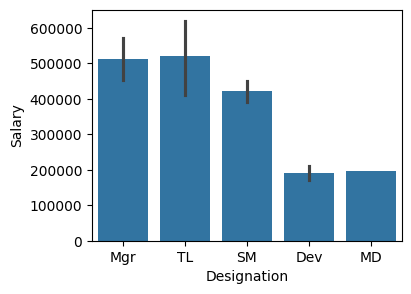

In [226]:
_ = sns.barplot(data = df_emp, x = desg, y = "Salary", estimator = "sum")  

#### ANOVA (Analysis of Variance)

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

- The samples are independent.
- Each sample is from a normally distributed population.
- The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

#### f-statistics

The F-statistic, also known as the F-ratio or F-value, is a statistical measure used in analysis of variance (ANOVA) and regression analysis. It is a ratio of two variances and is used to assess whether the means of two or more groups are significantly different from each other.

The F-statistic is calculated by dividing the variance between group means by the variance within groups. It is used to test the null hypothesis that the means of the groups are equal. A larger F-statistic indicates a larger difference between group means relative to the variation within groups, which suggests that the difference is more likely to be statistically significant
.
#### p-value
The p-value, or probability value, is a measure that helps determine the significance of the results in statistical hypothesis testing. It represents the probability of obtaining an observed result (or more extreme) under the assumption that the null hypothesis is true.

The range of possible p-values is between 0 and 1. Here's what different ranges of p-values typically indicate:

- p ≤ 0.05: Usually considered statistically significant. This means that there is strong evidence against the null hypothesis, and it is likely to be rejected. The results are unlikely to occur by chance alone.

- 0.05 < p ≤ 0.10: Marginally significant. The evidence against the null hypothesis is weaker compared to p ≤ 0.05, but it may still be worth considering depending on the context and specific requirements of the analysis.

- 0.10 < p ≤ 0.50: Not statistically significant. There is insufficient evidence to reject the null hypothesis at the commonly used significance level of α = 0.05. The results are not considered to be statistically meaningful or reliable.

- p > 0.50: Highly likely to occur by chance. This range of p-values suggests that the observed result is not unusual or significant. The null hypothesis cannot be rejected based on this evidence.

**Null Hypothesis(𝐻o) :There is no significant difference in the mean salary among the different designations.**

𝐻o : 𝜇1 = 𝜇2 = 𝜇3 = … = 𝜇𝑘

**Alternate Hypothesis(𝐻1):There is a significant difference in the mean salary between the two designation groups.**

𝐻1 : 𝜇1 ≠ 𝜇2 ≠ 𝜇3 ≠ … ≠ 𝜇𝑘

where: 
 - 𝜇1,𝜇2,𝜇3,…,𝜇𝑘  are the population means of salary for each designation group.
 - 𝑘 is the number of designation groups.

In [239]:
def print_result(alpha, p_value, ho, ha):
    if p_value < alpha:
        print("Reject the null hypothesis.", ha)
    else:
        print("Fail to reject the null hypothesis.", ho)

In [240]:
ho = "There is no significant difference in the mean salary among the different designations."
ha = "There is a significant difference in the mean salary between the two designation groups."

desg = df_emp.Designation.unique()
grps = [df_emp[df_emp.Designation == d].Salary for d in desg]

f_stat, p_value = stats.f_oneway(*grps)

print_result(0.05, p_value, ho, ha)

Reject the null hypothesis. There is a significant difference in the mean salary between the two designation groups.


**Categorical-Categorical**

In [243]:
contingency_matrix = pd.crosstab(df_emp.Gender, df_emp.Car)
contingency_matrix

Car,No,Yes
Gender,,
Female,2,7
Male,8,13


#### Chi-square

The chi-square test is a statistical test used to determine whether there is a significant association between two categorical variables. It is commonly used to analyze contingency tables, which display the frequency distributions of categorical variables in a cross-tabulation format.

- Formulation of Hypotheses:
    - Null Hypothesis (H0): There is no association between the categorical variables.
    - Alternative Hypothesis (H1): There is an association between the categorical variables.
      
- Calculation of Expected Frequencies:
    - Calculate the expected frequencies for each cell in the contingency table under the assumption that the variables are independent (i.e., if the null hypothesis is true).
    - Expected frequency = (row total * column total) / total number of observations

- Calculation of Test Statistic:
    - Summation of ((Oi - Ei) ** 2 / Ei), where Oi is observerd frequency and Ei is expected frequency

- Determination of Degrees of Freedom:
    - Degrees of freedom = (number of rows - 1) * (number of columns - 1)

- Interpretation of Results:
    - Compare the calculated chi-square test statistic to the critical value from the chi-square distribution table at a specified significance level (usually α = 0.05).
        - If the calculated chi-square statistic exceeds the critical value, reject the null hypothesis and conclude that there is a significant association between the categorical variables.
        - If the calculated chi-square statistic does not exceed the critical value, fail to reject the null hypothesis, and conclude that there is no significant association between the categorical variables.

In [245]:
stats.chi2_contingency(contingency_matrix)

Chi2ContingencyResult(statistic=np.float64(0.17857142857142855), pvalue=np.float64(0.6726038174415168), dof=1, expected_freq=array([[ 3.,  6.],
       [ 7., 14.]]))

In [250]:
Ho = "There is no association between gender and car"
Ha = "There is significant association between gender and car"
contingency_matrix = pd.crosstab(df_emp.Gender, df_emp.Car)
p_value = stats.chi2_contingency(contingency_matrix).pvalue
print_result(p_value, 0.05, Ho, Ha)

Reject the null hypothesis. There is significant association between gender and car


<br><br><br><br><br><br><br><br><br><br><br><br>